In [63]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [59]:
NplusBar = 3
NminusBar = 3

Nplus = np.random.poisson(NplusBar)
Nminus = np.random.poisson(NminusBar)

print(Nplus)
print(Nminus)

4
3


In [78]:
#n choose k
def binom(n,k):
    returnVal = 0
    if(n >=k):
        returnVal =  math.factorial(n) // math.factorial(k) // math.factorial(n-k)
    else:
        returnVal = 0
    return returnVal

def samplePositive(mean):
    val = -999
    while(val < 0):
        val = np.random.poisson(mean)
    return val


In [80]:
#Now run the stats on pairs for 1000 events
nEvents = 1000
pppairs = []
mmpairs = []
pmpairs = []
nplus = -1
nminus = -1

for event in range(nEvents):
    nplus = samplePositive(NplusBar)
    nminus = samplePositive(NminusBar)
    #print(nplus)
    #print(nminus)
    pppairs.append(binom(nplus,2))
    mmpairs.append(binom(nminus,2))
    pmpairs.append(nplus*nminus)
    


In [84]:
print(len(pppairs))
print(len(mmpairs))
print(len(pmpairs))

1000
1000
1000


In [88]:
ppmean = []
mmmean = []
pmmean = []

ppsum = 0
mmsum = 0
pmsum = 0  

for i in range(nEvents):  
    ppsum += pppairs[i]
    mmsum += mmpairs[i]
    pmsum += pmpairs[i]
    
    ppmean.append(ppsum/(i+1))
    mmmean.append(mmsum/(i+1))
    pmmean.append(pmsum/(i+1))

In [91]:
print(pmmean)

[15.0, 16.5, 22.666666666666668, 23.0, 20.8, 19.333333333333332, 16.857142857142858, 14.75, 13.555555555555555, 13.4, 13.545454545454545, 12.75, 12.923076923076923, 13.285714285714286, 12.6, 12.125, 11.529411764705882, 11.0, 10.421052631578947, 10.65, 10.80952380952381, 10.409090909090908, 10.130434782608695, 10.041666666666666, 9.84, 9.461538461538462, 9.11111111111111, 8.928571428571429, 8.689655172413794, 9.1, 9.096774193548388, 9.09375, 8.93939393939394, 8.764705882352942, 9.085714285714285, 9.083333333333334, 8.945945945945946, 8.736842105263158, 8.666666666666666, 8.9, 8.731707317073171, 8.666666666666666, 8.744186046511627, 8.818181818181818, 8.622222222222222, 8.608695652173912, 8.46808510638298, 8.666666666666666, 8.653061224489797, 8.6, 8.666666666666666, 8.98076923076923, 8.981132075471699, 9.555555555555555, 9.763636363636364, 9.75, 9.719298245614034, 9.672413793103448, 9.711864406779661, 9.7, 9.60655737704918, 9.5, 9.444444444444445, 9.359375, 9.4, 9.43939393939394, 9.3880

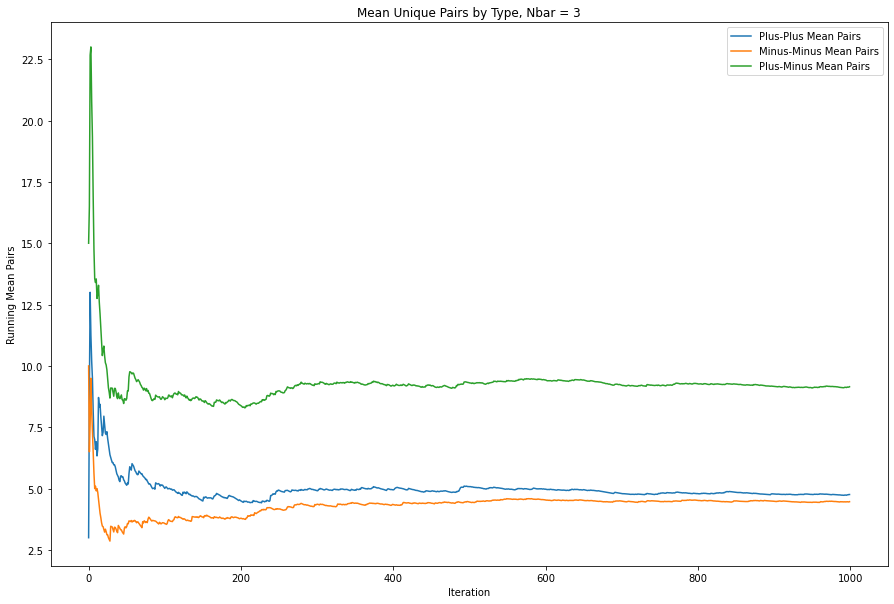

In [96]:
#plot these
plt.figure(figsize = (15,10))
plt.plot(ppmean, label = "Plus-Plus Mean Pairs")
plt.plot(mmmean, label = "Minus-Minus Mean Pairs")
plt.plot(pmmean, label = "Plus-Minus Mean Pairs")
plt.legend()
plt.title("Mean Unique Pairs by Type, Nbar = 3")
plt.xlabel("Iteration")
plt.ylabel("Running Mean Pairs")
plt.savefig("+-TrackStats.pdf")